In [74]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets, utils
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

In [2]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [3]:
transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))])

In [4]:
trainset = datasets.FashionMNIST('./.data',
                   train=True,
                   download=True,
                   transform=transform)

testset = datasets.FashionMNIST('./.data',
                   train=False,
                   download=True,
                   transform=transform)


In [64]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)


60000

In [6]:
images, labels =next(iter(train_loader)) 

In [7]:
images.shape ,labels.shape



# print(images.size(), images.shape)
# print(labels.size(), labels.shape)
# print(b.size(), b.shape)


(torch.Size([128, 1, 28, 28]), torch.Size([128]))

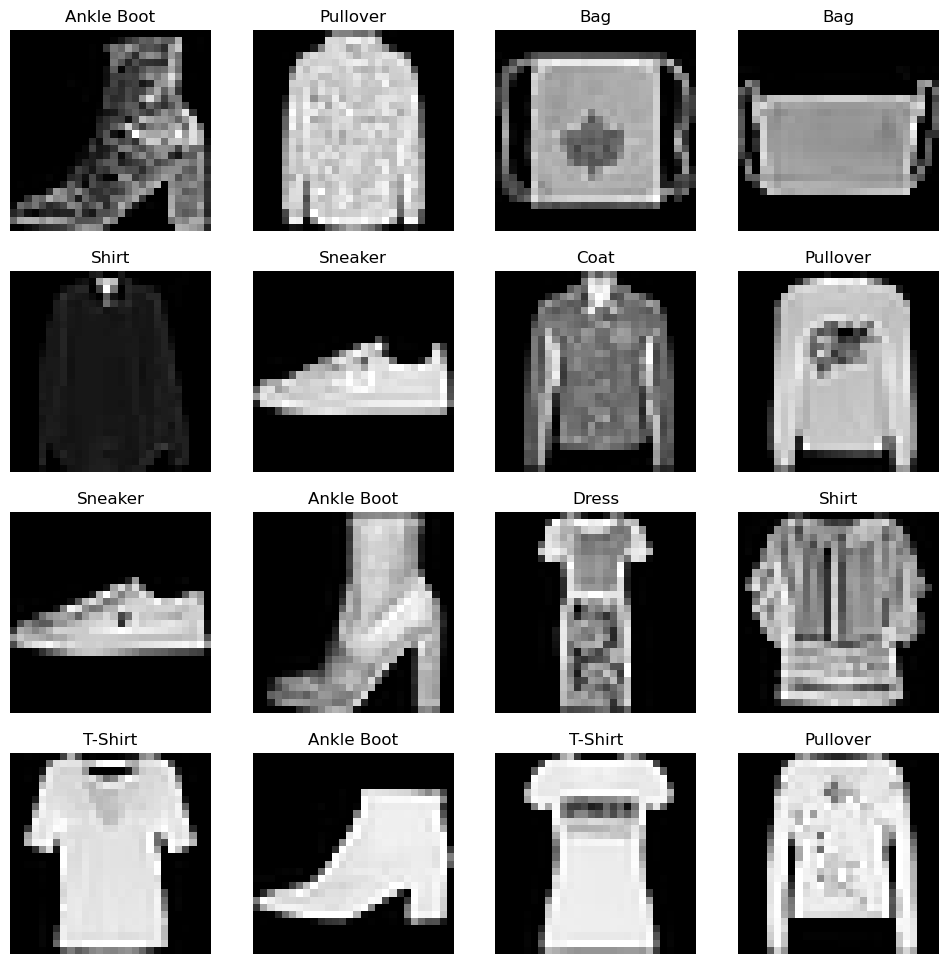

In [8]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}





figure = plt.figure(figsize=(12,12))
cols, rows = 4,4
for i in range (1, cols * rows+1):
    image = images[i].squeeze()
    label_idx= labels[i].item()
    label = labels_map[label_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(image, cmap="gray")

plt.show()


In [52]:
class NN(nn.Module):
    def __init__(self) :
        super(NN,self).__init__()

        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6,16,3)
        self.fc1 = nn.Linear(16* 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # 0~ 9까지 

    def forward(self,x):
        x= F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x= F.max_pool2d(F.relu(self.conv2(x)),2)
        x= x.view(-1,self.num_flat_features(x))
        x= F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x= self.fc3(x)
        return x
    
    def num_flat_features(self ,x):
        size = x.size()[1:]
        num_features =1 
        for s in size:
            num_features *= s
            
        return num_features



In [53]:
net =NN()
print(net)

NN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [54]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [56]:
input = torch.randn(1,1,28,28)
out = net(input)
print(out)

tensor([[-0.1108, -0.0840,  0.1048, -0.0300, -0.1123,  0.0846, -0.0903, -0.0074,
         -0.0339, -0.0108]], grad_fn=<AddmmBackward0>)


torch.Size([1, 10])

In [57]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [58]:
total_batch =len(train_loader)
print(total_batch)

469


In [61]:
for epoch in range(10):

    running_loss = 0.0

    for i, data in enumerate(train_loader,0):
        inputs, labels =data

        optimizer.zero_grad()

        output = net(inputs)
        loss = F.cross_entropy(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i%100 ==99:
            print('Epoch: {}, Iter: {}, Loss: {}'.format(epoch+1, i+1, running_loss+1))
            running_loss = 0.0
          




    # for batch_idx, (data, target) in enumerate(train_loader):
    #     data, target = data.to(DEVICE), target.to(DEVICE)
    #     optimizer.zero_grad()
    #     output = model(data)
    #     loss = F.cross_entropy(output, target)
    #     loss.backward()
    #     optimizer.step()

Epoch: 1, Iter: 100, Loss: 230.93972063064575
Epoch: 1, Iter: 200, Loss: 229.5652437210083
Epoch: 1, Iter: 300, Loss: 227.4793872833252
Epoch: 1, Iter: 400, Loss: 222.337562084198
Epoch: 2, Iter: 100, Loss: 160.2663825750351
Epoch: 2, Iter: 200, Loss: 106.53717941045761
Epoch: 2, Iter: 300, Loss: 86.01194542646408
Epoch: 2, Iter: 400, Loss: 79.78474164009094
Epoch: 3, Iter: 100, Loss: 73.1434690952301
Epoch: 3, Iter: 200, Loss: 69.00992751121521
Epoch: 3, Iter: 300, Loss: 67.9372681081295
Epoch: 3, Iter: 400, Loss: 67.01962035894394
Epoch: 4, Iter: 100, Loss: 62.44602990150452
Epoch: 4, Iter: 200, Loss: 64.54230690002441
Epoch: 4, Iter: 300, Loss: 61.73788559436798
Epoch: 4, Iter: 400, Loss: 62.44525012373924
Epoch: 5, Iter: 100, Loss: 60.8834725022316
Epoch: 5, Iter: 200, Loss: 57.70701664686203
Epoch: 5, Iter: 300, Loss: 57.942389100790024
Epoch: 5, Iter: 400, Loss: 58.16446313261986
Epoch: 6, Iter: 100, Loss: 55.16458863019943
Epoch: 6, Iter: 200, Loss: 55.25229185819626
Epoch: 6, I

In [65]:
PATH = './fashon_mnist.pth'
torch.save(net.state_dict(),PATH)

In [66]:
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [67]:
def imshow(image):
    image = image /2 +0.5
    npimg = image.numpy()

    fig = plt.figure(figsize=(16,8))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

In [69]:

images, labels = next(iter(train_loader)) 

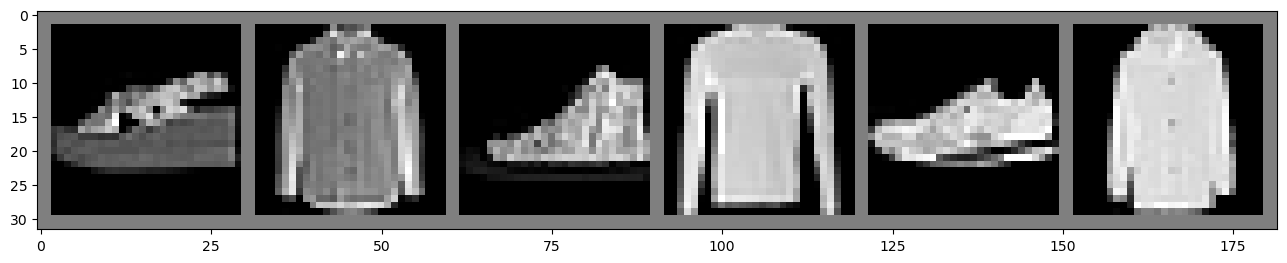

In [75]:
import torchvision

imshow(torchvision.utils.make_grid(images[:6]))

In [77]:
outputs = net(images)

_, predicted = torch.max(outputs,1)
print(predicted)



tensor([7, 4, 7, 2, 7, 4, 3, 7, 4, 4, 7, 3, 8, 8, 7, 3, 4, 0, 7, 3, 4, 5, 9, 3,
        5, 2, 5, 0, 4, 2, 5, 2, 0, 3, 4, 3, 7, 7, 7, 1, 2, 9, 3, 6, 0, 0, 0, 8,
        1, 8, 2, 5, 8, 8, 0, 4, 0, 5, 5, 8, 3, 5, 3, 3, 9, 8, 3, 7, 5, 0, 7, 3,
        0, 9, 3, 5, 4, 9, 0, 8, 1, 8, 4, 3, 1, 0, 3, 0, 1, 7, 8, 2, 8, 7, 5, 4,
        2, 3, 2, 2, 2, 0, 9, 9, 0, 1, 5, 4, 9, 0, 4, 5, 5, 5, 4, 7, 7, 9, 6, 7,
        8, 8, 7, 6, 0, 8, 1, 5])


In [79]:
print(''.join('{}, '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Sneaker, Coat, Sneaker, Pullover, Sneaker, Coat, 


In [80]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct +=(predicted == labels).sum().item()


print(100*correct / total)


81.68
